In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
import os
import requests

# Simulate input folder
input_dir = 'kaggle/input/'
os.makedirs(input_dir, exist_ok=True)

In [15]:
train_data = pd.read_csv(input_dir + "train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test_data = pd.read_csv(input_dir + "test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
train_data['Sex'] = train_data['Sex'].fillna('Unknown')
train_data['Sex'], sex_map = pd.factorize(train_data['Sex'])

sex_map = {category: code for code, category in enumerate(sex_map)}
print(sex_map)

test_data['Sex'] = test_data['Sex'].fillna('Unknown')
test_data['Sex'] = test_data['Sex'].map(sex_map)

{'male': 0, 'female': 1}


In [18]:
train_data['AgeMissing'] = train_data['Age'].isnull().astype(int)
test_data['AgeMissing'] = test_data['Age'].isnull().astype(int)

median_age = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(median_age)
test_data['Age'] = test_data['Age'].fillna(median_age)

In [19]:
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
train_data['Cabin'] = train_data['Cabin'].str[0]
train_data['Cabin'], cab_map = pd.factorize(train_data['Cabin'])

cab_map = {category: code for code, category in enumerate(cab_map)}
print(cab_map)

test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].str[0]
test_data['Cabin'] = test_data['Cabin'].map(cab_map)

{'U': 0, 'C': 1, 'E': 2, 'G': 3, 'D': 4, 'A': 5, 'B': 6, 'F': 7, 'T': 8}


In [20]:
train_data['Embarked'] = train_data['Embarked'].fillna('Unknown')
train_data['Embarked'], emb_map = pd.factorize(train_data['Embarked'])

emb_map = {category: code for code, category in enumerate(emb_map)}
print(emb_map)

test_data['Embarked'] = test_data['Embarked'].fillna('Unknown')
test_data['Embarked'] = test_data['Embarked'].map(emb_map)

{'S': 0, 'C': 1, 'Q': 2, 'Unknown': 3}


In [21]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data['Title'], title_map = pd.factorize(train_data['Title'])

title_map = {cat: code for code, cat in enumerate(title_map)}
print(title_map)

test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Title'].map(title_map).fillna(-1).astype(int)

{'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Don': 4, 'Rev': 5, 'Dr': 6, 'Mme': 7, 'Ms': 8, 'Major': 9, 'Lady': 10, 'Sir': 11, 'Mlle': 12, 'Col': 13, 'Capt': 14, 'Countess': 15, 'Jonkheer': 16}


In [22]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

In [23]:
train_data['IsAlone'] = (train_data['FamilySize'] == 0).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 0).astype(int)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

In [25]:
feature_col = ['Pclass', 'Sex', 'Title', 'Age', 'AgeMissing', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Fare', 'Cabin', 'Embarked']
target = 'Survived'

In [26]:
X = train_data[feature_col].values
y = train_data[target].values

X_test = test_data[feature_col].values

In [27]:
import torch

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [28]:
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import random_split

dataset = TensorDataset(X_tensor, y_tensor)

train_size = int(0.999 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


test_dataset = TensorDataset(X_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [29]:
from torch import nn

class TitanicLinearModel(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_size, output_size):
        super().__init__()

        layers = [
            nn.Linear(in_features=input_size, out_features=hidden_size),
            nn.ReLU()
        ]

        for _ in range(hidden_layers):
            layers.append(nn.Linear(in_features=hidden_size, out_features=hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=0.2))

        layers.append(nn.Linear(in_features=hidden_size, out_features=output_size))

        self.sequential = nn.Sequential(*layers)

    def forward(self, x):
        return self.sequential(x)

In [30]:
input_size = len(feature_col)
hidden_layers = 1
hidden_size = 16
output_size = 1

model = TitanicLinearModel(input_size, hidden_layers, hidden_size, output_size)

In [31]:
import torch

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [32]:
def get_device():
    """
    Determine the appropriate device for PyTorch operations.

    Returns:
        torch.device: The best available device ('mps', 'cuda', or 'cpu').
    """
    if torch.backends.mps.is_built() and torch.backends.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

device = get_device()
print(device)

model.to(device)

mps


TitanicLinearModel(
  (sequential): Sequential(
    (0): Linear(in_features=12, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [33]:
from tqdm.auto import tqdm

EPOCHS = 6

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in tqdm(range(EPOCHS)):
    train_loss = train_acc = 0

    for batch, (X,y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)

        model.train()
        y_logits = model(X).squeeze(1)

        loss = loss_fn(y_logits, y.float())
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        y_probs = torch.sigmoid(y_logits)
        y_preds = (y_probs >= 0.5).long()

        train_acc += (y == y_preds).sum().item() / len(y)

    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)


    val_loss = val_acc = 0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(val_dataloader):
            X = X.to(device)
            y = y.to(device)

            model.eval()

            y_logits = model(X).squeeze(1)
            loss = loss_fn(y_logits, y.float())
            val_loss += loss.item()

            y_probs = torch.sigmoid(y_logits)
            y_preds = (y_probs >= 0.5).long()

            val_acc += (y == y_preds).sum().item() / len(y)

    val_loss = val_loss / len(val_dataloader)
    val_acc = val_acc / len(val_dataloader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"EPOCH: {epoch} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | val_loss: {val_loss:.4f} | val_acc: {val_acc:.4f}")

/Users/veselov/miniforge3/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 50%|█████     | 3/6 [00:02<00:02,  1.40it/s]

EPOCH: 0 | train_loss: 0.6556 | train_acc: 0.6210 | val_loss: 0.5226 | val_acc: 1.0000
EPOCH: 1 | train_loss: 0.6305 | train_acc: 0.6490 | val_loss: 0.4203 | val_acc: 1.0000
EPOCH: 2 | train_loss: 0.5943 | train_acc: 0.6809 | val_loss: 0.3111 | val_acc: 1.0000


100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

EPOCH: 3 | train_loss: 0.5510 | train_acc: 0.7156 | val_loss: 0.1986 | val_acc: 1.0000
EPOCH: 4 | train_loss: 0.5073 | train_acc: 0.7552 | val_loss: 0.1350 | val_acc: 1.0000
EPOCH: 5 | train_loss: 0.4915 | train_acc: 0.7728 | val_loss: 0.0945 | val_acc: 1.0000


In [34]:
import pandas as pd

df = pd.DataFrame({
    "epoch": list(range(1, EPOCHS + 1)),
    "train_loss": train_losses,
    "val_loss": val_losses,
    "train_acc": train_accuracies,
    "val_acc": val_accuracies
})

<Axes: title={'center': 'Accuracy Over Epochs'}, xlabel='epoch'>

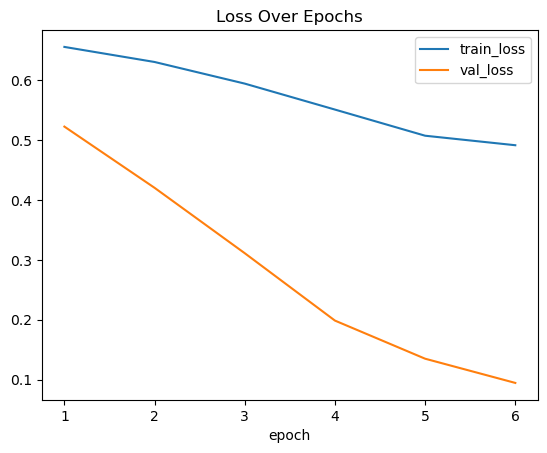

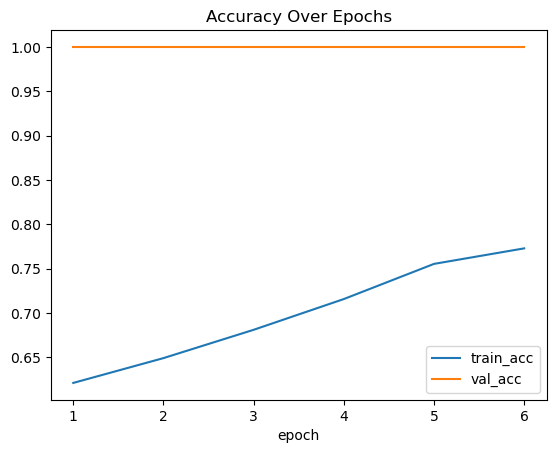

In [35]:
df.plot(x="epoch", y=["train_loss", "val_loss"], title="Loss Over Epochs")
df.plot(x="epoch", y=["train_acc", "val_acc"], title="Accuracy Over Epochs")

In [36]:
model.eval()

preds = []

with torch.inference_mode():
    for batch, X in enumerate(test_dataloader):
        X = X[0].to(device)

        model.eval()

        y_logits = model(X).squeeze(1)

        y_probs = torch.sigmoid(y_logits)
        y_preds = (y_probs >= 0.5).long()
        preds.append(y_preds)

preds = torch.cat(preds)

In [37]:
preds = preds.cpu().numpy()
ans = pd.read_csv(input_dir + "gender_submission.csv")
ans["Survived_pred"] = preds

acc = (ans["Survived"] == ans["Survived_pred"]).mean()
print(f"Accuracy compared to gender_submission.csv: {acc:.4f}")

Accuracy compared to gender_submission.csv: 0.8254


In [38]:
from IPython.display import FileLink

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': preds
})

submission['Survived'] = submission['Survived'].astype(int)

submission.to_csv('submission.csv', index=False)
display(FileLink('submission.csv'))

/Users/veselov/Documents/Python/titanic/submission.csv